# H3 Hamiltonians

We want to understand how physical, and in particular quantum, systems evolve with time, and we also know that the "black box" behaviour of quantum systems is constrained to be unitary. But we can look inside the black box and see where these unitaries come from! This is necessary if we want to simulate the system based on its physics.

Author: [Monit Sharma](https://github.com/MonitSharma)
LinkedIn: [Monit Sharma](https://www.linkedin.com/in/monitsharma/)
Twitter: [@MonitSharma1729](https://twitter.com/MonitSharma1729)
Medium : [MonitSharma](https://medium.com/@_monitsharma)

![](https://codebook.xanadu.ai/pics/magnet.svg)

### Codercise H.3.1. 
(a) Complete the code to build the unitary (). We can verify the output is unitary using unitary_check.

In [ ]:
def mag_z_unitary(B, time):
    """Creates a unitary operator to evolve the state of an electron in 
    a magnetic field.
    
    Args:
        B (float): The strength of the field, assumed to point in the z direction.
        time (float): The time (t) we evolve the electron state for.
        
    Returns:
        array[complex]: The unitary matrix implementing time evolution.
    """
    e = 1.6e-19
    m_e = 9.1e-31
    alpha = B*e/(2*m_e)
    ##################
    # YOUR CODE HERE #
    ##################
    #matrix = np.array([[0, 0], [0, 0]]) # CHANGE THIS
    matrix = np.array([[0+0j,0],[0,0]])
    matrix[0][0] = np.exp(alpha*time*1j)
    matrix[1][1] = np.exp(alpha*time*-1j)


    return matrix

B, t = 0.1, 0.6
if unitary_check(mag_z_unitary(B, t)):
    print("The output is unitary for B =", B, "and t =", t, ".")


(b) Write a circuit which evolves the bar magnet in a magnetic field for time , starting in state  and applying the unitary you constructed in the previous exercise. The mag_z_unitary function is available for you to use.

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def mag_z_0_v1(B, time):
    """Simulates an electron (initial state |0>) in a magnetic field, using a 
    unitary matrix.
    
    Args:
        B (float): The strength of the field, assumed to point in the z direction.
        time (float): The time we evolve the electron state for.

    Returns:
        array[complex]: The state of the system after evolution.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    qml.QubitUnitary(mag_z_unitary(B, time), wires=0)

    return qml.state()


(c) Rewrite the circuit from part (b) using PennyLane's qml.RZ method, and check it gives the same state for a given pair of parameter values.

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def mag_z_0_v2(B, time):
    """Simulates an electron (initial state |0>) in a magnetic field, using a 
    Z rotation.
    
    Args:
        B (float): The strength of the field, assumed to point in the z direction.
        time (float): The time we evolve the electron state for.

    Returns:
        array[complex]: The state of the system after evolution.
    """
    e = 1.6e-19
    m_e = 9.1e-31
    alpha = B*e/(2*m_e)
    ##################
    # YOUR CODE HERE #
    ##################
    qml.RZ(-2*alpha*time,wires=0)
    return qml.state()

B, t = 0.1, 0.6
if np.allclose(mag_z_0_v1(B, t), mag_z_0_v2(B, t)):
    print("The two circuits give the same answer!")


(d) Hitting the submit button will plot the real and imaginary parts 

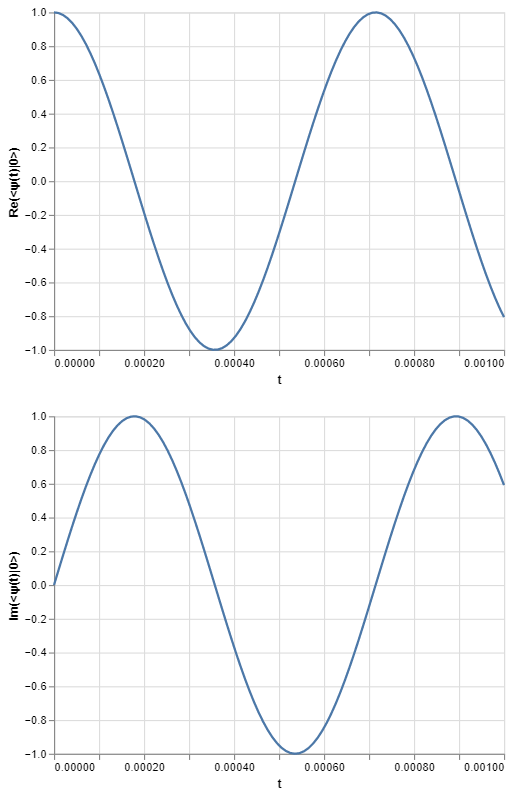

(e) Finally, write a circuit (using the  rotation) which evolves a qubit starting in state . From the plots of  and , what do you think is happening?

In [ ]:
dev = qml.device("default.qubit", wires=1)

def evolve_plus_state(B, time):
    """Simulates an electron (initial state |+>) in a magnetic field.
    
    Args:
        B (float): The strength of the field, assumed to point in the z direction.
        time (float): The time we evolve the electron state for.
    """
    e = 1.6e-19
    m_e = 9.1e-31
    alpha = B*e/(2*m_e)
    ##################
    # YOUR CODE HERE #
    ##################
    qml.Hadamard(wires=0)
    qml.RZ(-2*alpha*time,wires=0)

@qml.qnode(dev)
def mag_z_plus_X(B, time):
    """Simulates an electron (initial state |+>) in a magnetic field and returns <X>.
    
    Args:
        B (float): The strength of the field, assumed to point in the z direction.
        time (float): The time we evolve the electron state for.

    Returns:
        float: Expectation value for the Pauli X operator.
    """
    evolve_plus_state(B, time)
    return qml.expval(qml.PauliX(0))

@qml.qnode(dev)
def mag_z_plus_Y(B, time):
    """Simulates an electron (initial state |+>) in a magnetic field and returns <Y>.
    
    Args:
        B (float): The strength of the field, assumed to point in the z direction.
        time (float): The time we evolve the electron state for.

    Returns:
        float: Expectation value for the Pauli X operator.
    """
    evolve_plus_state(B, time)
    return qml.expval(qml.PauliY(0))

##################
# HIT SUBMIT FOR #
# PLOTTING MAGIC #
##################


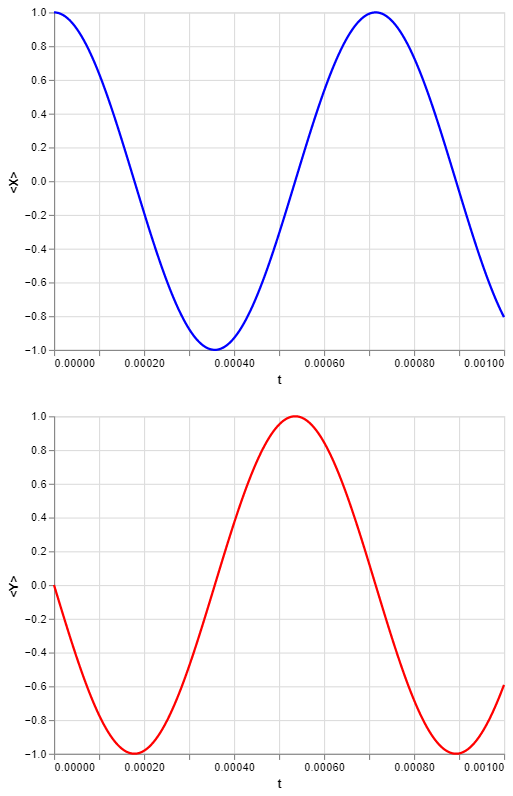